# Result Visualization Notebook

This notebook visualizes the results of our LLM-based social network simulation.

In [3]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
# plt.style.use('seaborn')

## Load Analysis Results

In [2]:
snapshot = "35" # "/snapshots/N" siendo N la snapshot a analizar

carpeta = "simulation_results_20241001_223902"
dir = '../data/'+carpeta+'/analysis/'+snapshot

with open(dir+'/centrality.json', 'r') as f:
    centrality = json.load(f)

with open(dir+'/communities.json', 'r') as f:
    communities = json.load(f)

with open(dir+'/influencers.json', 'r') as f:
    influencers = json.load(f)

with open(dir+'/engagement_rates.json', 'r') as f:
    engagement_rates = json.load(f)

with open(dir+'/influencer_trends.json', 'r') as f:
    influencer_trends = json.load(f)

with open(dir+'/message_data.json', 'r') as f:
    messages = json.load(f)

NameError: name 'json' is not defined

## Visualize Centrality Distribution

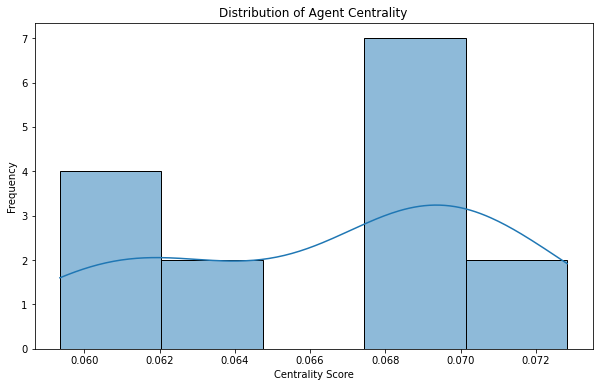

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(list(centrality.values()), kde=True)
plt.title("Distribution of Agent Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Frequency")
plt.show()

## Visualize Community Sizes

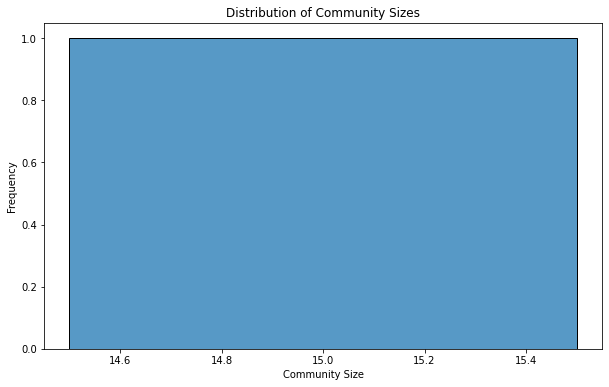

Number of communities: 1
Average community size: 15.00


In [63]:
community_sizes = [len(c) for c in communities]

plt.figure(figsize=(10, 6))
sns.histplot(community_sizes, kde=False, discrete=True)
plt.title("Distribution of Community Sizes")
plt.xlabel("Community Size")
plt.ylabel("Frequency")
plt.show()

print(f"Number of communities: {len(communities)}")
print(f"Average community size: {sum(community_sizes) / len(communities):.2f}")

## Analyze Influencers

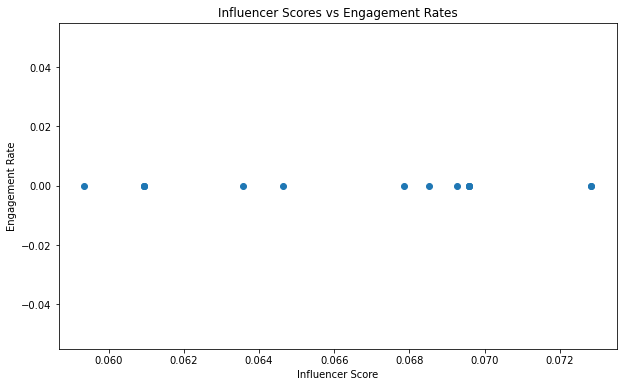

Number of identified influencers: 15
Average influencer score: 0.0667
Average engagement rate: 0.0000


In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(list(influencers.values()), list(engagement_rates.values()))
plt.title("Influencer Scores vs Engagement Rates")
plt.xlabel("Influencer Score")
plt.ylabel("Engagement Rate")
plt.show()
print(f"Number of identified influencers: {len(influencers)}")
print(f"Average influencer score: {sum(influencers.values()) / len(influencers):.4f}")
print(f"Average engagement rate: {sum(engagement_rates.values()) / len(engagement_rates):.4f}")

## Visualize Influencer Trends

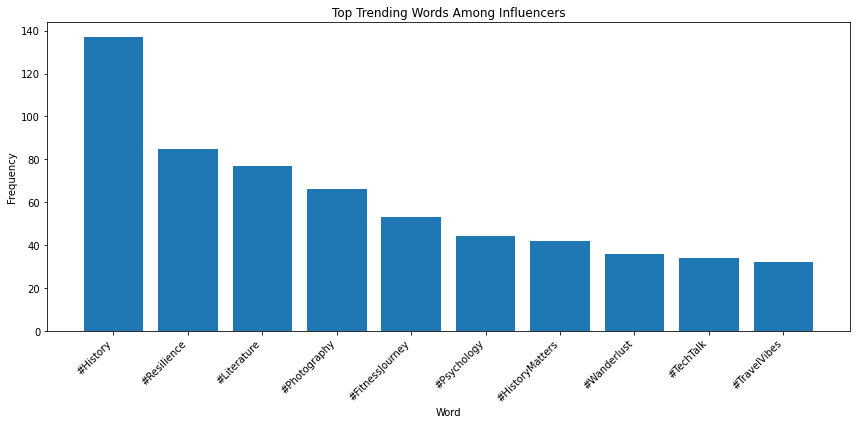

In [65]:
trend_words, trend_counts = zip(*influencer_trends)

plt.figure(figsize=(12, 6))
plt.bar(trend_words, trend_counts)
plt.title("Top Trending Words Among Influencers")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Message

#### Message Sentiments

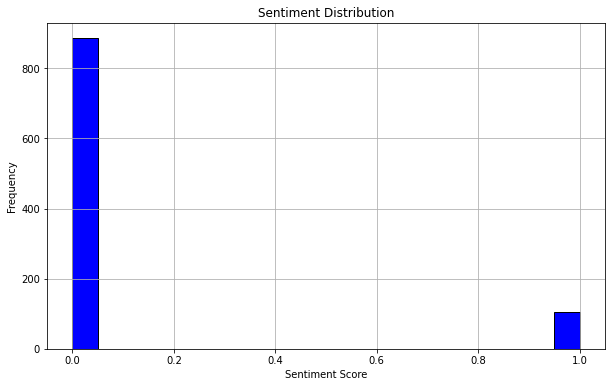

In [66]:
sentiments = messages['sentiments']

plt.figure(figsize=(10, 6))
plt.hist(sentiments, bins=20, color='blue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Message Sentiments Polarization

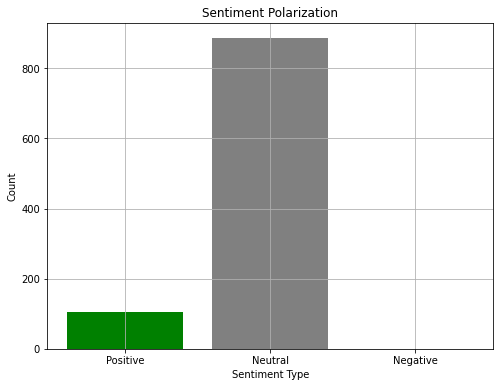

In [67]:
positive_count = messages['positive_count']
neutral_count = messages['neutral_count']
negative_count = messages['negative_count']

labels = ['Positive', 'Neutral', 'Negative']
counts = [positive_count, neutral_count, negative_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'gray', 'red'])
plt.title('Sentiment Polarization')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.grid(True)
plt.show() 

#### Message Top Topics

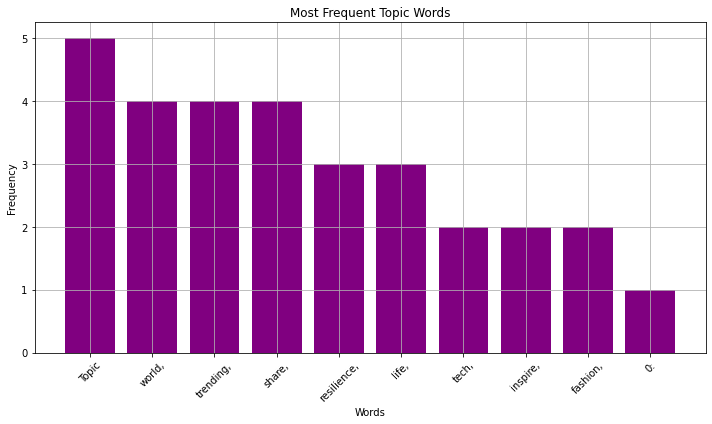

In [68]:
topics = messages['topics']
topic_counts = Counter([word for topic in topics for word in topic.split()])
most_common_topics = topic_counts.most_common(10)
labels, counts = zip(*most_common_topics)

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='purple')
plt.title('Most Frequent Topic Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Message Propagation

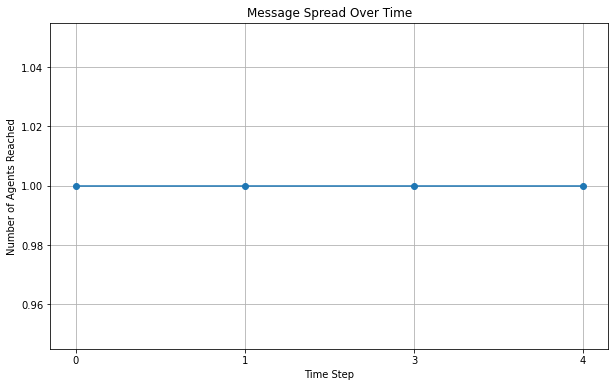

In [69]:
spread = messages['spread']

plt.figure(figsize=(10, 6))
plt.plot(list(spread.keys()), list(spread.values()), marker='o')
plt.title('Message Spread Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Agents Reached')
plt.grid(True)
plt.show()

#### Message Count Per Agent

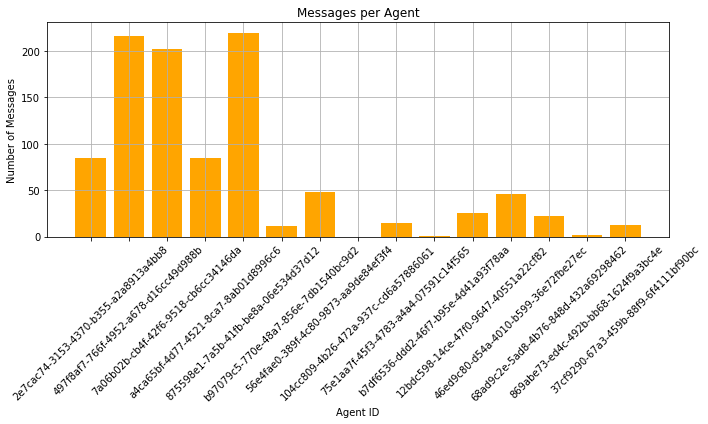

In [70]:
message_counts = messages['message_counts']
agent_ids = list(message_counts.keys())
counts = list(message_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(agent_ids, counts, color='orange')
plt.title('Messages per Agent')
plt.xlabel('Agent ID')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()